# DSCI 503 - Homework 07
### Pradeep K Timsina

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Problem 1: NYC Restaurants Dataset

In [2]:
nyc = pd.read_csv('nyc.txt', sep='\t')
nyc.head(10)

,Price,Food,Decor,Service,Wait,East
0,43,22,18,20,36,0
1,32,20,19,19,22,0
2,34,21,13,18,20,0
3,41,20,20,17,25,0
4,54,24,19,21,32,0
5,52,22,22,21,15,0
6,34,22,16,21,25,0
7,34,20,18,21,21,1
8,39,22,19,22,23,1
9,44,21,17,19,27,1


In [3]:
X1 = nyc.iloc[:,1:].values
y1 = nyc.iloc[:,0].values
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=1)
print("Training Features Shape:",X_train_1.shape)
print("Test Features Shape:\t",X_test_1.shape)

Training Features Shape: (134, 5)
Test Features Shape:	 (34, 5)


In [4]:
print(X1.shape)
print(y1.shape)

(168, 5)
(168,)


In [5]:
nyc_mod = LinearRegression()
nyc_mod.fit(X_train_1, y_train_1)

print('Intercept:\t', nyc_mod.intercept_)
print('Coefficients:\t', nyc_mod.coef_)

Intercept:	 -23.75543532248892
Coefficients:	 [ 1.55693926  2.00700907 -0.25440527  0.09203064  2.63235537]


In [6]:
train_r2 = nyc_mod.score(X_train_1, y_train_1)
test_r2 = nyc_mod.score(X_test_1, y_test_1)

print('Training r-Squared:', round(train_r2,4))
print('Testing r-Squared: ', round(test_r2,4))

Training r-Squared: 0.6306
Testing r-Squared:  0.6245


In [7]:
test_pred_1 = np.round(nyc_mod.predict(X_test_1),2)
test_pred_1
print("Observed Prices: ",y_test_1[:10])
print("Estimated Prices:",test_pred_1[:10])

Observed Prices:  [33 45 54 38 22 47 38 51 46 47]
Estimated Prices: [39.2  38.09 49.35 39.26 19.72 47.4  36.85 50.07 48.26 43.01]


In [8]:
nyc_new = np.array([22,12, 20, 15, 0, 18, 19, 22, 34, 1, 25, 22, 18, 36, 0]).reshape(3,5)
new_pred_1 = nyc_mod.predict(nyc_new)
print("Estimated Prices: ",np.round(new_pred_1,2))

Estimated Prices:  [30.87 42.57 58.06]


# Problem 2: Diamonds Dataset

In [9]:
diamonds = pd.read_csv('diamonds.txt', sep='\t')
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
diamonds['ln_carat'] = np.log(diamonds.carat)
diamonds['ln_price'] = np.log(diamonds.price)
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,ln_carat,ln_price
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131


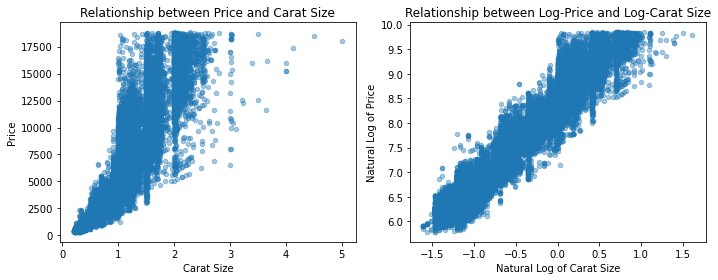

In [11]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.scatter(x=diamonds.carat, y=diamonds.price, alpha =0.4, s= 20)
plt.xlabel('Carat Size')
plt.ylabel('Price')
plt.title('Relationship between Price and Carat Size')
plt.subplot(1,2,2)
plt.scatter(x=diamonds.ln_carat, y=diamonds.ln_price, alpha =0.4, s= 20)
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Natural Log of Price')
plt.title('Relationship between Log-Price and Log-Carat Size')
plt.tight_layout()
plt.show()


In [12]:
X2 = diamonds.loc[:,['ln_carat']].values
y2 = diamonds.loc[:,['ln_price']].values
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.1, random_state=1)
print("Training Features Shape: ",X_train_2.shape)
print("Test Features Shape:\t ",X_test_2.shape)

Training Features Shape:  (48546, 1)
Test Features Shape:	  (5394, 1)


In [13]:
dia_mod = LinearRegression()
dia_mod.fit(X_train_2, y_train_2)
print('Intercept:\t', dia_mod.intercept_[0])
print('Coefficients:\t', dia_mod.coef_)

Intercept:	 8.448298621179152
Coefficients:	 [[1.67493107]]


In [14]:
train_r2_2 = dia_mod.score(X_train_2, y_train_2)
test_r2_2 = dia_mod.score(X_test_2, y_test_2)

print('Training r-Squared:', round(train_r2_2,4))
print('Testing r-Squared: ', round(test_r2_2,4))

Training r-Squared: 0.933
Testing r-Squared:  0.9328


In [15]:
test_pred_2 = np.round(dia_mod.predict(X_test_2),2)
#test_pred_2
print("Observed Prices: ",np.round(np.exp(y_test_2[:10].astype(float).flatten().tolist())))
print("Estimated Prices:",np.round(np.exp(test_pred_2[:10].astype(float).flatten().tolist())))

Observed Prices:  [ 564. 5914. 2562.  537. 5964.  984. 5247.  611. 9645. 1162.]
Estimated Prices: [ 728. 6311. 2101.  765. 6311. 1604. 5324. 1043. 9228.  804.]


In [16]:
diamonds_new =  np.log([0.5, 1.0, 1.5, 2.0, 2.5, 3.0]).reshape(6, -1)
diamonds_new
new_pred_2 = dia_mod.predict(diamonds_new)
new_pred_2
new_pred_3 = np.exp(new_pred_2).round()
print("Estimated Prices :",new_pred_3.astype(int).flatten().tolist())

Estimated Prices : [1462, 4667, 9204, 14902, 21656, 29390]


# Problem 3: Heart Disease Dataset

In [17]:
heart_disease = pd.read_csv('heart_disease.txt', sep='\t')
heart_disease.head(10)

,age,sex,chest_pain_type,resting_bp,serum_chol,fasting_blood_sugar,electrocardio,max_heart_rate,exercise_induced_angina,oldpeak,slope,major_vessels,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,2
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,2


In [18]:
X3 = heart_disease.iloc[:,0:13]
y3 = heart_disease.loc[:,'heart_disease']

In [19]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size=0.2, random_state=1,stratify = y3)
print("Training Features Shape:",X_train_3.shape)
print("Test Features Shape:\t",X_test_3.shape)

Training Features Shape: (216, 13)
Test Features Shape:	 (54, 13)


In [20]:
hd_mod = LogisticRegression( solver='lbfgs', penalty = 'none', max_iter = 1000)
hd_mod.fit(X_train_3, y_train_3)
print('Intercept:', hd_mod.intercept_)
print('Coefficients:\n', hd_mod.coef_)

Intercept: [-9.76955308]
Coefficients:
 [[-0.03369354  1.77352793  0.75064049  0.02497329  0.01424683 -0.68496792
   0.32434679 -0.01949189  0.72693369  0.36467709  0.28540667  1.07332451
   0.38451964]]


In [21]:
train_acc = hd_mod.score(X_train_3, y_train_3)
test_acc = hd_mod.score(X_test_3, y_test_3)

print('Training Accuracy:', round(train_acc,4))
print('Testing Accuracy: ', round(test_acc,4))

Training Accuracy: 0.8472
Testing Accuracy:  0.8148


In [22]:
test_pred_3 = hd_mod.predict(X_test_3)
print("Observed Labels :",(y_test_3).head(10).values.tolist())
print("Predicted Labels: ",(pd.DataFrame(test_pred_3).head(10).values.tolist()))

Observed Labels : [2, 2, 2, 1, 1, 2, 1, 1, 2, 1]
Predicted Labels:  [[2], [2], [2], [1], [1], [2], [1], [1], [2], [1]]


In [23]:
classes = ['1', '2']
pd.DataFrame(hd_mod.predict_proba(X_test_3),columns=classes).head(10)

,1,2
0,0.012052,0.987948
1,0.043787,0.956213
2,0.040174,0.959826
3,0.848533,0.151467
4,0.874248,0.125752
5,0.052785,0.947215
6,0.921326,0.078674
7,0.943849,0.056151
8,0.010246,0.989754
9,0.996576,0.003424


# Problem 4: Gapminder Dataset

In [24]:
gm = pd.read_csv('gapminder_data.txt', sep='\t')
gm18 = gm.loc[gm.year == 2018,:]
gm18.head(10)

,country,year,continent,population,life_exp,gdp_per_cap,gini
40112,Afghanistan,2018,asia,36400000,58.7,1870,36.8
40113,Albania,2018,europe,2930000,78.0,12400,29.0
40114,Algeria,2018,africa,42000000,77.9,13700,27.6
40115,Angola,2018,africa,30800000,65.2,5850,42.6
40116,Antigua and Barbuda,2018,americas,103000,77.6,21000,40.0
40117,Argentina,2018,americas,44700000,77.0,18900,42.4
40118,Armenia,2018,europe,2930000,76.0,8660,32.6
40119,Australia,2018,asia,24800000,82.9,45800,32.3
40120,Austria,2018,europe,8750000,81.8,44600,30.5
40121,Azerbaijan,2018,europe,9920000,72.3,16600,32.4


In [25]:
X4 = gm18.loc[:,['life_exp', 'gdp_per_cap','gini']]
y4 = gm18.loc[:,'continent']
#.to_numpy()
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X4, y4, test_size=0.3, random_state=1,stratify = y4)
print("Training Features Shape: ",X_train_4.shape)
print("Test Features Shape:  \t ",X_test_4.shape)

Training Features Shape:  (128, 3)
Test Features Shape:  	  (56, 3)


In [26]:
gm_mod = LogisticRegression( solver='lbfgs', penalty = 'none',multi_class='multinomial',max_iter=400)
gm_mod.fit(X_train_4, y_train_4)
print('Intercept:', gm_mod.intercept_)
print('Coefficients:\n', gm_mod.coef_)

Intercept: [ 0.00205071 -0.00472772  0.00331953 -0.00064252]
Coefficients:
 [[-8.83916406e-02 -1.02870279e-04  2.01103330e-01]
 [-8.63004520e-02  3.30470086e-05  1.59928483e-01]
 [ 1.93872495e-02  2.94782800e-05 -2.33841516e-02]
 [ 1.55304843e-01  4.03449907e-05 -3.37647661e-01]]


In [27]:
train_acc = gm_mod.score(X_train_4, y_train_4)
test_acc = gm_mod.score(X_test_4, y_test_4)

print('Training Accuracy:', round(train_acc,4))
print('Testing Accuracy: ', round(test_acc,4))

Training Accuracy: 0.625
Testing Accuracy:  0.5893


In [28]:
test_pred_4 = gm_mod.predict(X_test_4)
test_pred_4
print("Observed Labels: ",y_test_4.iloc[:8].values.tolist())
print("Estimated Labels:",test_pred_4[:8])

Observed Labels:  ['americas', 'asia', 'asia', 'asia', 'africa', 'europe', 'asia', 'europe']
Estimated Labels: ['asia' 'europe' 'africa' 'asia' 'europe' 'europe' 'africa' 'europe']


In [29]:
classes_conti = ['africa', 'americas','asia','europe']
pd.DataFrame(gm_mod.predict_proba(X_test_4),columns=classes_conti).head(10)

,africa,americas,asia,europe
0,0.066398,0.259417,0.578477,0.095708
1,0.001109,0.043555,0.358341,0.596995
2,0.662816,0.210904,0.122822,0.003458
3,0.227022,0.262035,0.456582,0.054360
4,0.002028,0.004898,0.112341,0.880734
5,0.001847,0.023808,0.252409,0.721936
6,0.630288,0.219064,0.146739,0.003909
7,0.000027,0.000732,0.033143,0.966099
8,0.001238,0.010807,0.163428,0.824527
9,0.178244,0.117895,0.492520,0.211342


In [30]:
gm_new = pd.DataFrame([[75, 5000, 30],[75, 5000, 40],[75, 5000, 50],[75, 20000, 30],[75, 20000, 40],[75, 20000, 50]])
pd.DataFrame(gm_mod.predict_proba(gm_new),columns=classes_conti)

C:\Users\pradi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,africa,americas,asia,europe
0,0.038378,0.025582,0.286945,0.649094
1,0.432704,0.191083,0.342744,0.033469
2,0.726308,0.212487,0.060948,0.000257
3,0.004866,0.024915,0.264902,0.705316
4,0.092405,0.313437,0.532905,0.061252
5,0.258990,0.581991,0.158234,0.000785


* Country 0 is most likely in europe
* Country 1 is most likely in africa
* Country 2 is most likely in africa
* Country 3 is most likely in europe
* Country 4 is most likely in asia
* Country 5 is most likely in americas